<a href="https://colab.research.google.com/github/lalakin99/Max_Flow_Min_Cut_Analysis/blob/main/HW1_LalAkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 1 - Network Dynamics and Learning**



My group mates that I collaborated with are Vida Ahmedy 301905, Faeze Saeedian 301304, Reza Barati 301309, Xiyang Zu 288740




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/NetworkLABS/hw1
#I used my own path for this part, this is the the only part to modify when checking the code

/content/drive/MyDrive/NetworkLABS/hw1


In [ ]:
import numpy as np
import scipy as scipy
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import cvxpy as cp

# *Question 1*



Firstly the graph is drawn. Red labels denote each capacity value associated with corresponding link.

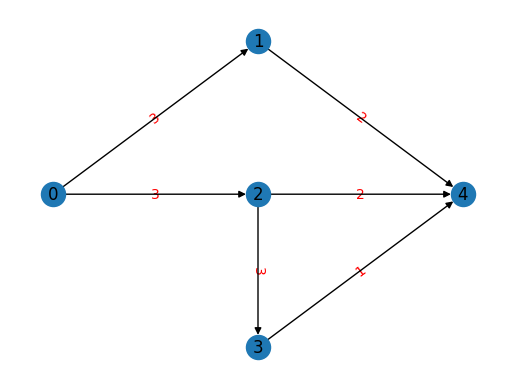

In [ ]:
G = nx.DiGraph()
G.add_edges_from([(0,1),(0,2),(2,3),(2,4),(1,4),(3,4)])

pos = {0:[0,0], 1:[1,1], 2:[1,0], 3:[1,-1], 4:[2,0]}

nx.draw_networkx_edge_labels(G,pos,edge_labels={(0,1):'3',
(0,2):'3',(1,4):'2',(2,4):'2',
(2,3):'3',(3,4):'1'},font_color='red')

nx.draw(G, pos, with_labels = True)

Graphically, (o,a,b,c,d) corresponds to respectively (0,1,2,3,4)

*a)* For the first question, the problem is to find the minimum aggregate capacity that can be removed for no feasible flow from o to d (in my case 0 to 4) to exist. This mean we have to find in the minimum cut definition of a problem, how many units of flow can be sent, so that all of the reverse links from the final steps of a Ford Fulkerson Algorithm to be all going from 4 to 0, and for there to be no links going from 0 to 4 to still be feasible. To solve this, I first of all implemented the Maximum Flow problem, and then I double checked my findings by a Min Cut problem. As it can be seen, both of the problems have the same result, 5, as maximum throughput that can be sent from o to d.

In [ ]:
G[0][1]['capacity'] = 3
G[0][2]['capacity'] = 3
G[1][4]['capacity'] = 2
G[3][4]['capacity'] = 1
G[2][3]['capacity'] = 3
G[2][4]['capacity'] = 2
#defined capacity values for each edge, so that we can use the maximum flow algorithm
nx.algorithms.flow.maximum_flow(G,0,4)

(5, {0: {1: 2, 2: 3}, 1: {4: 2}, 2: {3: 1, 4: 2}, 3: {4: 1}, 4: {}})

In [ ]:
#the min cut and max flow duality is tested
nx.algorithms.flow.minimum_cut(G,0,4)

(5, ({0, 1, 2, 3}, {4}))

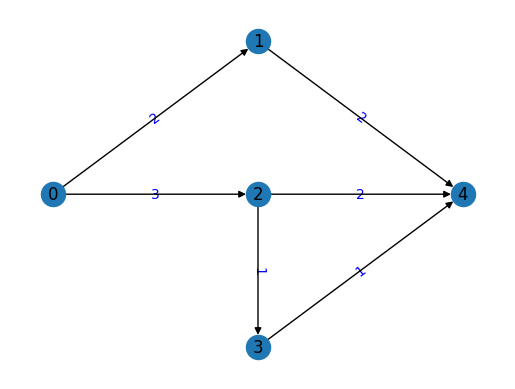

In [ ]:
GG = nx.DiGraph()
GG.add_edges_from([(0,1),(0,2),(2,3),(2,4),(1,4),(3,4)])

pos = {0:[0,0], 1:[1,1], 2:[1,0], 3:[1,-1], 4:[2,0]}

nx.draw_networkx_edge_labels(GG,pos,edge_labels={(0,1):'2',
(0,2):'3',(1,4):'2',(2,4):'2',
(2,3):'1',(3,4):'1'},font_color='blue')

nx.draw(GG, pos, with_labels = True)

This graph shows how many units of flow has been sent through each link. As it can be seen, 5 units of inflow come to the destination node.

From this result we also see that the partition set of Min Cut is, 0, 1, 2, 3 vs. 4.

b) I solved this part by hand, and the explanation details are given in my Homework Report.


c)For this question we have to construct an algorithm that will add one unit of capacity to each possible link per iteration, and calculate the max flow result. Then by comparing the differences in the max flow values decides which addidtion is the best, then keeps adding more and more units of capacity until there is a relationship visible that one can plot as a function.


In [ ]:
GG = nx.DiGraph()
GG.add_edges_from([(0,1),(0,2),(2,3),(2,4),(1,4),(3,4)])

pos = {0:[0,0], 1:[1,1], 2:[1,0], 3:[1,-1], 4:[2,0]}

GG[0][1]['capacity'] = 3
GG[0][2]['capacity'] = 3
GG[1][4]['capacity'] = 3
GG[3][4]['capacity'] = 1
GG[2][3]['capacity'] = 3
GG[2][4]['capacity'] = 2

nx.algorithms.flow.maximum_flow(GG,0,4)

(6, {0: {1: 3, 2: 3}, 1: {4: 3}, 2: {3: 1, 4: 2}, 3: {4: 1}, 4: {}})

I decided to add capacities one by one, and I observed only adding 1 unit of capacity to the link between 1 and 4 makes the max-flow 6.

In [ ]:
GG = nx.DiGraph()
GG.add_edges_from([(0,1),(0,2),(2,3),(2,4),(1,4),(3,4)])

pos = {0:[0,0], 1:[1,1], 2:[1,0], 3:[1,-1], 4:[2,0]}

GG[0][1]['capacity'] = 3
GG[0][2]['capacity'] = 3
GG[1][4]['capacity'] = 3
GG[3][4]['capacity'] = 1
GG[2][3]['capacity'] = 3
GG[2][4]['capacity'] = 2

nx.algorithms.flow.maximum_flow(GG,0,4)

(6, {0: {1: 3, 2: 3}, 1: {4: 3}, 2: {3: 0, 4: 3}, 3: {4: 0}, 4: {}})

After the first step, adding one more unit of capacity to any of the links didnt change the max flow. Which can be becasue there are some differences to the links capacities on the same path, and only adding one more unit of capacity doesnt change the throughput. So I add it to 0 to 1.

In [ ]:
GG = nx.DiGraph()
GG.add_edges_from([(0,1),(0,2),(2,3),(2,4),(1,4),(3,4)])

pos = {0:[0,0], 1:[1,1], 2:[1,0], 3:[1,-1], 4:[2,0]}

GG[0][1]['capacity'] = 4
GG[0][2]['capacity'] = 3
GG[1][4]['capacity'] = 4
GG[3][4]['capacity'] = 1
GG[2][3]['capacity'] = 3
GG[2][4]['capacity'] = 2

nx.algorithms.flow.maximum_flow(GG,0,4)

(7, {0: {1: 4, 2: 3}, 1: {4: 4}, 2: {3: 1, 4: 2}, 3: {4: 1}, 4: {}})

Adding the 3rd unit of capacity, I see the only difference happens when I add to the 1 to 4 link again. For now I observe, if u (extra unit of capacity) = 0, throughput is 5. If u = 1 or 2, throughput is 6. If u = 3, t = 7.

In [ ]:
GG = nx.DiGraph()
GG.add_edges_from([(0,1),(0,2),(2,3),(2,4),(1,4),(3,4)])

pos = {0:[0,0], 1:[1,1], 2:[1,0], 3:[1,-1], 4:[2,0]}

GG[0][1]['capacity'] = 4
GG[0][2]['capacity'] = 4
GG[1][4]['capacity'] = 4
GG[3][4]['capacity'] = 1
GG[2][3]['capacity'] = 3
GG[2][4]['capacity'] = 2

nx.algorithms.flow.maximum_flow(GG,0,4)

(7, {0: {1: 4, 2: 3}, 1: {4: 4}, 2: {3: 1, 4: 2}, 3: {4: 1}, 4: {}})

Adding the 4th extra capacity also doesnt change anything, because of the reason mentioned before so I add it this time to 0 to 2. Updating also if u = 3 or 4, t = 7.

In [ ]:
GG = nx.DiGraph()
GG.add_edges_from([(0,1),(0,2),(2,3),(2,4),(1,4),(3,4)])

pos = {0:[0,0], 1:[1,1], 2:[1,0], 3:[1,-1], 4:[2,0]}

GG[0][1]['capacity'] = 4
GG[0][2]['capacity'] = 4
GG[1][4]['capacity'] = 4
GG[3][4]['capacity'] = 1
GG[2][3]['capacity'] = 3
GG[2][4]['capacity'] = 3

nx.algorithms.flow.maximum_flow(GG,0,4)

(8, {0: {1: 4, 2: 4}, 1: {4: 4}, 2: {3: 1, 4: 3}, 3: {4: 1}, 4: {}})

Now we can see the t value has became 8. We can see a relationship forming but I will keep going for some more iterations.

In [ ]:
GG = nx.DiGraph()
GG.add_edges_from([(0,1),(0,2),(2,3),(2,4),(1,4),(3,4)])

pos = {0:[0,0], 1:[1,1], 2:[1,0], 3:[1,-1], 4:[2,0]}

GG[0][1]['capacity'] = 5
GG[0][2]['capacity'] = 4
GG[1][4]['capacity'] = 5
GG[3][4]['capacity'] = 1
GG[2][3]['capacity'] = 3
GG[2][4]['capacity'] = 3

nx.algorithms.flow.maximum_flow(GG,0,4)

(9, {0: {1: 5, 2: 4}, 1: {4: 5}, 2: {3: 1, 4: 3}, 3: {4: 1}, 4: {}})

I did two steps at once, so adding 6 units and 7 units both result in 9 as the t value.

The rest of the details will be done by hand and you can observe them in the homework report.

# *Question 2*


Lets draw the relationships between the books and people first.

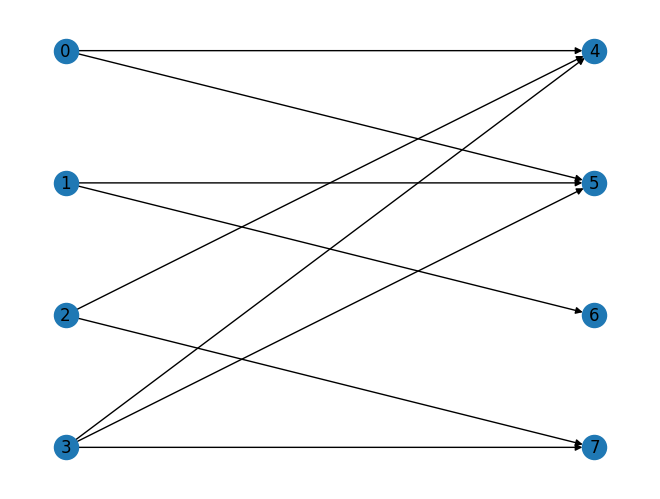

In [ ]:
T = nx.DiGraph()
T.add_edges_from([(0,4),(0,5),(1,5),(1,6),(2,4),(2,7),(3,4),(3,5),(3,7)])

pos = {0:[0,2], 1:[0,1], 2:[0,0], 3:[0,-1], 4:[1,2], 5:[1,1], 6:[1,0], 7:[1,-1]}

nx.draw(T,pos, with_labels=True)

a) To exploit Max-Flow for this question, lets draw the graph again, this time with a source and a sink. To solve the max flow problem, I used the Ford-Fulkerson algorithm, and this time the capacity of each link is 1, what is expected as a result to say a perfect matching exists is seeing 4 as the result of the max flow problem.

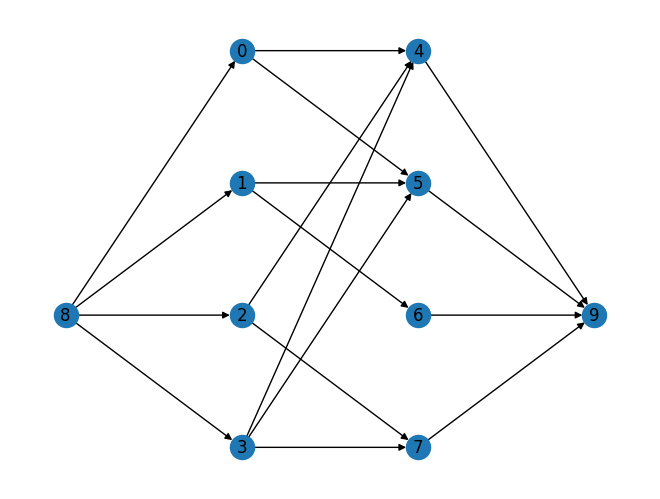

In [ ]:
T1 = nx.DiGraph()
T1.add_edges_from([(0,4),(0,5),(1,5),(1,6),(2,4),(2,7),(3,4),(3,5),(3,7),(8,0),(8,1),(8,2),(8,3),(4,9),(5,9),(6,9),(7,9)])

pos = {0:[0,2], 1:[0,1], 2:[0,0], 3:[0,-1], 4:[1,2], 5:[1,1], 6:[1,0], 7:[1,-1],8:[-1,0],9:[2,0]}

nx.draw(T1,pos, with_labels=True)

In [ ]:
T1[8][0]['capacity'] = 1
T1[8][1]['capacity'] = 1
T1[8][2]['capacity'] = 1
T1[8][3]['capacity'] = 1

T1[0][4]['capacity'] = 1
T1[0][5]['capacity'] = 1

T1[1][5]['capacity'] = 1
T1[1][6]['capacity'] = 1

T1[2][4]['capacity'] = 1
T1[2][7]['capacity'] = 1

T1[3][5]['capacity'] = 1
T1[3][7]['capacity'] = 1
T1[3][4]['capacity'] = 1

T1[4][9]['capacity'] = 1
T1[5][9]['capacity'] = 1
T1[6][9]['capacity'] = 1
T1[7][9]['capacity'] = 1

nx.algorithms.flow.maximum_flow(T1,8,9)

(4,
 {0: {4: 0, 5: 1},
  4: {9: 1},
  5: {9: 1},
  1: {5: 0, 6: 1},
  6: {9: 1},
  2: {4: 1, 7: 0},
  7: {9: 1},
  3: {4: 0, 5: 0, 7: 1},
  8: {0: 1, 1: 1, 2: 1, 3: 1},
  9: {}})

It can be seen that there exists a perfect matching. The source node has to distribute 4 units of flow 1 by 1 to each node it connects to, namely nodes 0, 1, 2, 3. Then these 4 nodes must choose only one of the links they have to send that one unit of flow. With this procedure, the people choose the books. Then, the 4 units pf flow get sent to the sink, 9th node, and we can see which is the perfect matching between people and books, each person only has one book that they took.
The matchings of people and books are:

*   Person 1 - Book 2
*   Person 2 - Book 3
*   Person 3 - Book 1
*   Person 4 - Book 4

I also wanted to double check for this question by implementing the simple way of finding if there is a perfect matching, and as it was found in the first step.

In [ ]:
my_match = {0: 5, 1: 6, 2: 4, 3: 7}
nx.is_perfect_matching(T, my_match)

True

Therefore by both of the methods I can say there exists a perfect matching between the people and the books.

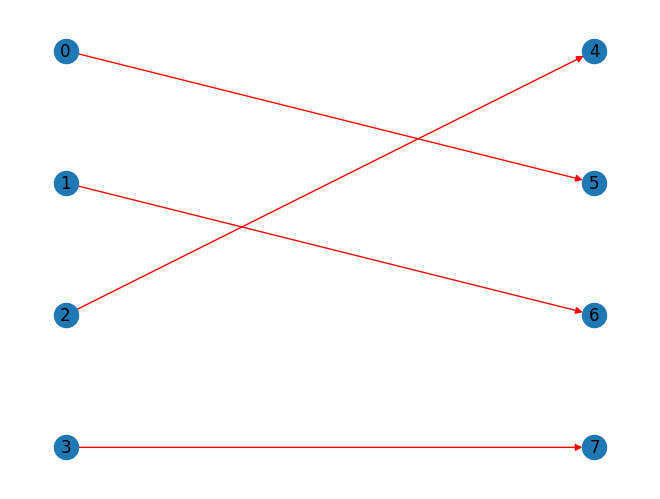

In [ ]:
T11 = nx.DiGraph()
T11.add_edges_from([(0,5),(1,6),(2,4),(3,7)])

pos = {0:[0,2], 1:[0,1], 2:[0,0], 3:[0,-1], 4:[1,2], 5:[1,1], 6:[1,0], 7:[1,-1],8:[-1,0],9:[2,0]}

nx.draw(T11,pos, with_labels=True, edge_color = 'red')

b)I solved this question by simply editing my graph, since now there are multiple copies of the books and every person can get an arbitrary number of books. I used Max-Flow Ford-Fulkerson again.


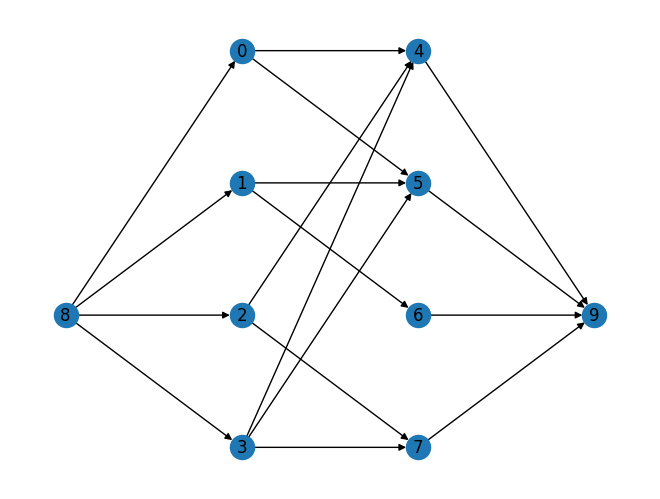

In [ ]:
T2 = nx.DiGraph()

T2.add_edges_from([(0,4),(0,5),(1,5),(1,6),(2,4),(2,7),(3,4),(3,5),(3,7),(8,0),(8,1),(8,2),(8,3),(4,9),(5,9),(6,9),(7,9)])

pos = {0:[0,2], 1:[0,1], 2:[0,0], 3:[0,-1], 4:[1,2], 5:[1,1], 6:[1,0], 7:[1,-1],8:[-1,0],9:[2,0]}

nx.draw(T2,pos, with_labels=True)

In [ ]:
#I selected a large enough (Big M) so that there is an arbitrary amount of flow that the network can have
T2[8][0]['capacity'] = 100
T2[8][1]['capacity'] = 100
T2[8][2]['capacity'] = 100
T2[8][3]['capacity'] = 100

T2[0][4]['capacity'] = 1
T2[0][5]['capacity'] = 1

T2[1][5]['capacity'] = 1
T2[1][6]['capacity'] = 1

T2[2][4]['capacity'] = 1
T2[2][7]['capacity'] = 1

T2[3][5]['capacity'] = 1
T2[3][7]['capacity'] = 1
T2[3][4]['capacity'] = 1

#here is where i edited to include the number of copies of the books to have those numbers as max capacity
T2[4][9]['capacity'] = 2
T2[5][9]['capacity'] = 3
T2[6][9]['capacity'] = 2
T2[7][9]['capacity'] = 2

nx.algorithms.flow.maximum_flow(T2,8,9)

(8,
 {0: {4: 0, 5: 1},
  4: {9: 2},
  5: {9: 3},
  1: {5: 1, 6: 1},
  6: {9: 1},
  2: {4: 1, 7: 1},
  7: {9: 2},
  3: {4: 1, 5: 1, 7: 1},
  8: {0: 1, 1: 2, 2: 2, 3: 3},
  9: {}})

As from this result, we can understand that, all books (and their copies) have been bought, expect for the 3rd book. The 2nd copy of the 3rd book was not bought, because we can see that there is only one unit of flow going to 6th node. Exactly 8 books were matched in this case scenario. Also I solved this by hand to understand if my solution was correct and by logic I reached the same result, all copies of all books have people intrested in them, besides the second copy of the 3rd book.

c)I solved by hand and the details of this solution is given in the report. However I wanted to check my intuition.

In [ ]:
T2 = nx.DiGraph()

T2.add_edges_from([(0,4),(0,5),(1,5),(1,6),(2,4),(2,7),(3,4),(3,5),(3,7),(8,0),(8,1),(8,2),(8,3),(4,9),(5,9),(6,9),(7,9)])

pos = {0:[0,2], 1:[0,1], 2:[0,0], 3:[0,-1], 4:[1,2], 5:[1,1], 6:[1,0], 7:[1,-1],8:[-1,0],9:[2,0]}

T2[8][0]['capacity'] = 100
T2[8][1]['capacity'] = 100
T2[8][2]['capacity'] = 100
T2[8][3]['capacity'] = 100

T2[0][4]['capacity'] = 1
T2[0][5]['capacity'] = 1

T2[1][5]['capacity'] = 1
T2[1][6]['capacity'] = 1

T2[2][4]['capacity'] = 1
T2[2][7]['capacity'] = 1

T2[3][5]['capacity'] = 1
T2[3][7]['capacity'] = 1
T2[3][4]['capacity'] = 1

#here is where i edited to include the number of copies of the books to have those numbers as max capacity
T2[4][9]['capacity'] = 3
T2[5][9]['capacity'] = 3
T2[6][9]['capacity'] = 1
T2[7][9]['capacity'] = 2

nx.algorithms.flow.maximum_flow(T2,8,9)

(9,
 {0: {4: 1, 5: 1},
  4: {9: 3},
  5: {9: 3},
  1: {5: 1, 6: 1},
  6: {9: 1},
  2: {4: 1, 7: 1},
  7: {9: 2},
  3: {4: 1, 5: 1, 7: 1},
  8: {0: 2, 1: 2, 2: 2, 3: 3},
  9: {}})

As it is seen, the matching is now up to 9, and there is no extra demand.

# *Question* *3*

In [ ]:
flow = scipy.io.loadmat('flow.mat')["flow"].reshape(28,)
capacities = scipy.io.loadmat('capacities.mat')["capacities"].reshape(28,)
B = scipy.io.loadmat('traffic.mat')["traffic"]
length = scipy.io.loadmat('traveltime.mat')["traveltime"].reshape(28,)

For this question, first I upload the required values, and name them according to what they are.
Then i draw the Highway Network of Los Angeles

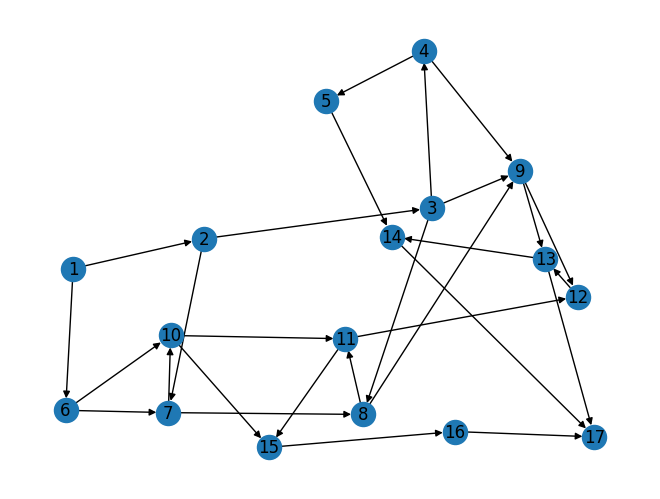

In [ ]:
L = nx.DiGraph()

L.add_nodes_from(list(range(1, 18)))

L.add_edges_from([
(1, 2, {'weight': length[0], 'capacity': capacities[0]}),
(2, 3, {'weight': length[1], 'capacity': capacities[1]}),
(3, 4, {'weight': length[2], 'capacity': capacities[2]}),
(4, 5, {'weight': length[3], 'capacity': capacities[3]}),
(1, 6, {'weight': length[4], 'capacity': capacities[4]}),
(6, 7, {'weight': length[5], 'capacity': capacities[5]}),
(7, 8, {'weight': length[6], 'capacity': capacities[6]}),
(8, 9, {'weight': length[7], 'capacity': capacities[7]}),
(9, 13, {'weight': length[8], 'capacity': capacities[8]}),
(2, 7, {'weight': length[9], 'capacity': capacities[9]}),
(3, 8, {'weight': length[10], 'capacity': capacities[10]}),
(3, 9, {'weight': length[11], 'capacity': capacities[11]}),
(4, 9, {'weight': length[12], 'capacity': capacities[12]}),
(5, 14, {'weight': length[13], 'capacity': capacities[13]}),
(6, 10, {'weight': length[14], 'capacity': capacities[14]}),
(10, 11, {'weight': length[15], 'capacity': capacities[15]}),
(10, 15, {'weight': length[16], 'capacity': capacities[16]}),
(7, 10, {'weight': length[17], 'capacity': capacities[17]}),
(8, 11, {'weight': length[18], 'capacity': capacities[18]}),
(9, 12, {'weight': length[19], 'capacity': capacities[19]}),
(11, 12, {'weight': length[20], 'capacity': capacities[20]}),
(12, 13, {'weight': length[21], 'capacity': capacities[21]}),
(13, 14, {'weight': length[22], 'capacity': capacities[22]}),
(11, 15, {'weight': length[23], 'capacity': capacities[23]}),
(13, 17, {'weight': length[25], 'capacity': capacities[25]}),
(14, 17, {'weight': length[25], 'capacity': capacities[25]}),
(15, 16, {'weight': length[26], 'capacity': capacities[26]}),
(16, 17, {'weight': length[27], 'capacity': capacities[27]}),
])

nx.draw(L, with_labels=True)

a) First question is to find the shortest path from node 1 to 17. I utilized the "shortest_path" method of NetworkX library for its ease and intuitive nature.


In [ ]:
nx.shortest_path(L, source=1, target=17, weight='weight')

[1, 2, 3, 9, 13, 17]

From the result we can see that the shortest path through this network is from 1 ➡ 2 ➡ 3 ➡ 9 ➡ 13 ➡ 17 also means in a zero traffic scenario, this path would be the quickest according to length since I used the "length.mat" as the weight matrix.



b) Maximum Flow is found by also implementing a method of NetworkX, and the value for the max-flow is 22448.


In [ ]:
nx.algorithms.flow.maximum_flow(L, 1, 17)

(22448,
 {1: {2: 8741, 6: 13707},
  2: {3: 8741, 7: 0},
  3: {4: 0, 8: 0, 9: 8741},
  4: {5: 0, 9: 0},
  5: {14: 0},
  6: {7: 4624, 10: 9083},
  7: {8: 4624, 10: 0},
  8: {9: 4624, 11: 0},
  9: {13: 6297, 12: 7068},
  10: {11: 825, 15: 8258},
  11: {12: 825, 15: 0},
  12: {13: 7893},
  13: {14: 5123, 17: 9067},
  14: {17: 5123},
  15: {16: 8258},
  16: {17: 8258},
  17: {}})

c)The external inflow, $ν$, is equal to the Node-Link Incidence Matrix which in context of this problem is "$B$" (traffic.mat) times the flow vector $f$ (flow.mat) $Bf = ν$

In [ ]:
n = B @ flow
#this is very intuitive i rewrote the equation above
print(n)

[ 16282   9094  19448   4957   -746   4768    413     -2  -5671   1169
     -5  -7131   -380  -7412  -7810  -3430 -23544]


d) In this question, the social optimum with delay $\tau_{e}(f_{e})$ is asked. We use this function as the cost function, i.e the cost to minimize.
$$ \sum_{e \in \varepsilon } f_{e}\tau_{e}(f_{e}) = \sum_{e \in \varepsilon }  \frac{f_{e}l_{e}} {1 - \frac{f_{e}} {C_{e}} } = \sum_{e \in \varepsilon } \left( \frac{l_{e}C_{e}} {1 - \frac{f_{e}} {C_{e}} } - l_{e}C_{e} \right)$$

In [ ]:
#In here i transformed the above matrix into the exogenous inflow matrix with the required values
ef = np.zeros(17)
ef[1-1] = n[1-1]
ef[17-1] = -n[1-1]
print(ef)

[ 16282.      0.      0.      0.      0.      0.      0.      0.      0.
      0.      0.      0.      0.      0.      0.      0. -16282.]


This is the vector of the exogenous flow from this point onwards.

In [ ]:
f = cp.Variable(28) #28 is the number of nodes, so we solve this problem for 28 variables
#the cost function is the objective function of this minimization problem
cost_func = cp.multiply(cp.multiply(length, capacities), cp.inv_pos(1 - f / capacities)) - cp.multiply(length, capacities)
objective = cp.Minimize(sum(cost_func))
#in here we define the constrains such as the exogenous inflow being equal to ef,
#flow being non-negative and smaller or equal to the capacities
constraints = [B @ f == ef, f >=0, f <= capacities]
#problem definition
prob = cp.Problem(objective, constraints)
#optimal cost will be the outcome of the solution
cost_opt = prob.solve()
#the value of the 28 flow values
flow_star1 = f.value
print(flow_star1)
print("Social optimum cost of this network is:", cost_opt)


[6.45415744e+03 5.91942052e+03 2.99529242e+03 2.99529238e+03
 9.82784256e+03 4.49705976e+03 2.89742905e+03 2.43597659e+03
 3.04733195e+03 5.34736916e+02 2.45267900e-04 2.92412785e+03
 4.69635735e-05 2.99529238e+03 5.33078280e+03 2.73086023e+03
 4.73429019e+03 2.13436762e+03 4.61452707e+02 2.31277254e+03
 3.19231288e+03 5.50508542e+03 2.31054037e+03 5.94563615e-05
 6.24187700e+03 5.30583275e+03 4.73429025e+03 4.73429025e+03]
Social optimum cost of this network is: 23835.484428892145


e)For this question we have to find the Wardrop equilibrium by now assuming this as the cost function to minimize.
$${\sum_{e \in \varepsilon } \int^{f{e}}_{0} \tau_{e}(s) ds}$$

In [ ]:
f = cp.Variable(28)
#Since in this objective function there is an integral, i solved the integral by a website and this is the formulation below
obj = cp.Minimize(sum(-cp.multiply(cp.multiply(capacities, length), cp.log(1-(f/capacities)))))
constraints = [B @ f == ef, f >= 0, f <= capacities]
prob = cp.Problem(obj, constraints)
cost = prob.solve()
warflow = f.value
print("Wardrop equilibrium flow:", f.value)
#the cost of wardrop equlibrium is each flow on each link under this equlibrium and the delay
delay = (length / (1 - (f.value/capacities)))
wardrop_cost = np.sum(f.value*delay)
print(f"Wardrop equlibrium cost: {wardrop_cost}")

Wardrop equilibrium flow: [6.53248337e+03 6.53248332e+03 2.20678778e+03 2.20678777e+03
 9.74951658e+03 4.49336744e+03 2.71426782e+03 2.20386163e+03
 3.34278618e+03 4.87658085e-05 1.88858694e+02 4.13683685e+03
 8.62354860e-06 2.20678777e+03 5.25614914e+03 2.24738256e+03
 4.78786625e+03 1.77909967e+03 6.99264884e+02 2.99791231e+03
 2.94664743e+03 5.94455974e+03 2.50794079e+03 1.17424862e-05
 6.77940513e+03 4.71472856e+03 4.78786626e+03 4.78786626e+03]
Wardrop equlibrium cost: 24162.200476835103


f)

To find the new Wardrop equilibrium with tolls, first I define the numerical way to reach the tolls. I use the social optimum flow value.

In [ ]:
#omega is the toll value for each link dependent on the capacity and the existing flow on it depending on the social optimum flow
omega = capacities * length * flow_star1 *1/(capacities - flow_star1)**2
print(omega)

[1.57316769e+00 1.68239759e-01 4.81099080e-02 9.71294806e-02
 1.16225346e+00 4.04180084e-01 9.87431118e-02 5.18296255e-02
 2.57426558e-01 5.59124116e-03 2.93996273e-09 7.52240079e-02
 5.40902108e-10 1.16230570e-01 4.17850225e-01 7.44251977e-02
 6.41112833e-02 1.64478680e-02 1.50089172e-03 1.36565720e-02
 6.05563396e-02 2.41821516e-01 6.33841687e-02 3.42504815e-10
 3.66131419e-01 2.48253134e-01 1.77909117e-01 4.68115309e-01]


After this, I define a numerical problem to solve in CVXPY again with a modified cost function now.

In [ ]:
f = cp.Variable(28)
#now the objective is not only the delay inside the integral but also the omega value, after solving the integral this is the equation resulting
objective = cp.Minimize(sum(-cp.multiply(cp.multiply(capacities, length), cp.log(1 - f/capacities))+ cp.multiply(omega, f)))
#flow constraints
constraints = [B @ f == ef, f >= 0, f <= capacities]
prob4 = cp.Problem(objective, constraints)
wcostopt = prob4.solve()
wtflow = f.value
print("Wardrop equilibrium flow:", wtflow)

Wardrop equilibrium flow: [6.45388465e+03 5.91937237e+03 2.99527894e+03 2.99527893e+03
 9.82811531e+03 4.49714611e+03 2.89741254e+03 2.43597513e+03
 3.04732326e+03 5.34512283e+02 2.80730737e-05 2.92409340e+03
 5.38118064e-06 2.99527893e+03 5.33096920e+03 2.73087680e+03
 4.73433825e+03 2.13424585e+03 4.61437436e+02 2.31274528e+03
 3.19231423e+03 5.50505950e+03 2.31049277e+03 6.82902706e-06
 6.24189000e+03 5.30577170e+03 4.73433826e+03 4.73433826e+03]


In [ ]:
print(f"Social optimum cost: {cost_opt}")
print(f"Wardrop equilibrium cost: {wardrop_cost}")
#now i define the social optimum cost function with the wardrop eq. flow
print(f"Wardrop equilibrium after introducing tolls: {wtflow @ (length/(1-(wtflow/capacities)))}")

Social optimum cost: 23835.484428892145
Wardrop equilibrium cost: 24162.200476835103
Wardrop equilibrium after introducing tolls: 23835.484341165567


As we can observe from here, the introduction of tolls have reduced the Wardrop cost and equilized it to the social optimum.

g) $${\displaystyle \psi_{e}(f_{e}) = f_{e}(\tau_{e}(f_{e}) − l_{e})}$$ is the new system cost function, so it is not just the travel time.

In [ ]:
f = cp.Variable(28)
cost_func = sum((cp.multiply(cp.multiply(length, capacities), cp.inv_pos(1 - f / capacities)) - cp.multiply(length, capacities) - cp.multiply(f, length)))
objective = cp.Minimize(cost_func)
constraints = [B @ f == ef, f >=0, f <= capacities]
prob = cp.Problem(objective, constraints)
cost_optt = prob.solve()
soflow_2 = f.value
print(soflow_2)
print("Social optimum cost of this network is:", ( soflow_2 @ ((length/(1-(soflow_2/capacities))) - length)))

[6.46805587e+03 5.61796836e+03 3.29755326e+03 3.29755230e+03
 9.81394413e+03 4.50161882e+03 3.00282644e+03 2.56415496e+03
 2.91779179e+03 8.50087506e+02 2.23884797e-03 2.32041286e+03
 9.62311872e-04 3.29755230e+03 5.31232531e+03 2.93148730e+03
 4.72971790e+03 2.34887988e+03 4.38673724e+02 1.96677699e+03
 3.37016081e+03 5.33693780e+03 2.14299192e+03 2.11138524e-04
 6.11173768e+03 5.44054421e+03 4.72971811e+03 4.72971811e+03]
Social optimum cost of this network is: 13334.304869286665


In [ ]:
omega2 = capacities * length * soflow_2 * 1/(capacities - soflow_2)**2
print(omega2)

[1.59589471e+00 1.37804596e-01 5.61977895e-02 1.15572649e-01
 1.15233772e+00 4.06091847e-01 1.07274603e-01 5.80095492e-02
 2.27948103e-01 9.44380365e-03 2.68365022e-08 4.93462245e-02
 1.10834117e-08 1.40289310e-01 4.12336826e-01 8.72013338e-02
 6.39814624e-02 1.89873278e-02 1.42062317e-03 1.06369214e-02
 6.82413634e-02 2.20130660e-01 5.45232943e-02 1.21628639e-09
 3.36845020e-01 2.73819294e-01 1.77513513e-01 4.66451964e-01]


In [ ]:
f = cp.Variable(28)
warcostf = sum(-cp.multiply(cp.multiply(length, capacities), cp.log(1 - (f/capacities))) - cp.multiply(f, length) + cp.multiply(omega2, f))
objective = cp.Minimize(warcostf)
constraints = [B @ f == ef, f >= 0, f <= capacities]
prob = cp.Problem(objective, constraints)
cost_opt = prob.solve()
warflow2 = f.value
print("Wardrop equilibrium flow:", warflow2)
print(f"Wardrop equilibrium after introducing tolls: {warflow2 @ (((length/(1-(soflow_2/capacities))) - length))}")

Wardrop equilibrium flow: [6.46830188e+03 5.61805542e+03 3.29755954e+03 3.29755941e+03
 9.81369799e+03 4.50141144e+03 3.00276080e+03 2.56407263e+03
 2.91793627e+03 8.50246455e+02 2.15010271e-04 2.32049566e+03
 1.35062725e-04 3.29755941e+03 5.31228654e+03 2.93143717e+03
 4.72974647e+03 2.34889709e+03 4.38688390e+02 1.96663216e+03
 3.37012551e+03 5.33675767e+03 2.14292289e+03 4.96106051e-05
 6.11177104e+03 5.44048230e+03 4.72974652e+03 4.72974652e+03]
Wardrop equilibrium after introducing tolls: 13334.291726617259
